In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 154M/163M [00:00<00:00, 1.61GB/s]
100% 163M/163M [00:00<00:00, 1.59GB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
mask_files = os.listdir('/content/data/with_mask')
no_mask_files = os.listdir('/content/data/without_mask')

In [ ]:
print(mask_files[:10])

['with_mask_1942.jpg', 'with_mask_2679.jpg', 'with_mask_3501.jpg', 'with_mask_2377.jpg', 'with_mask_2624.jpg', 'with_mask_421.jpg', 'with_mask_1310.jpg', 'with_mask_461.jpg', 'with_mask_775.jpg', 'with_mask_1695.jpg']


In [ ]:
print(no_mask_files[:10])

['without_mask_3680.jpg', 'without_mask_1661.jpg', 'without_mask_560.jpg', 'without_mask_1562.jpg', 'without_mask_2099.jpg', 'without_mask_3462.jpg', 'without_mask_2305.jpg', 'without_mask_300.jpg', 'without_mask_854.jpg', 'without_mask_700.jpg']


In [ ]:
print('Number of with mask images: ', len(mask_files))
print('Number of without mask images: ', len(no_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828


## with mask  -->  1

## without mask  -->  0

In [ ]:
mask_files = [1]*len(mask_files)
no_mask_files = [0]*len(no_mask_files)

In [ ]:
print(mask_files[:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
print(no_mask_files[:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
labels = mask_files + no_mask_files
print(len(labels))
print(labels[:10])
print(labels[-10:])

7553
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Displaying the sample images of With_Mask and Without_Mask

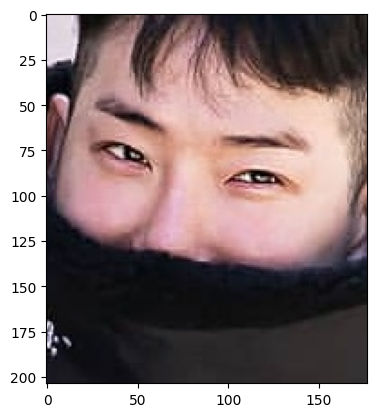

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_11.jpg')
imgplot = plt.imshow(img)
plt.show()

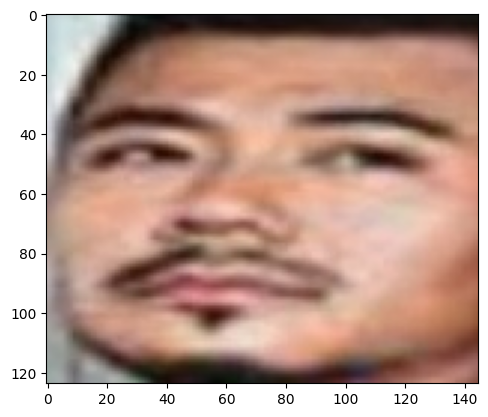

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_11.jpg')
imgplot = plt.imshow(img)
plt.show()

# Image Processing
## Convert the images into NUMPY Arrays

In [ ]:
with_mask = '/content/data/with_mask'
without_mask = '/content/data/without_mask'

In [ ]:
data = []

In [ ]:
for img_file in os.listdir(with_mask):
    img_path = os.path.join(with_mask, img_file)

    if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(img_path)
        image = image.resize((128, 128))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
for img_file in os.listdir(without_mask):
    img_path = os.path.join(without_mask, img_file)

    if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
      image = Image.open(img_path)
      image = image.resize((128, 128))
      image = image.convert('RGB')
      image = np.array(image)
      data.append(image)

In [ ]:
print(type(data), len(data))

<class 'list'> 7553


array([[[154, 125, 111],
        [149, 121, 107],
        [141, 113, 100],
        ...,
        [ 45,  31,  45],
        [ 42,  28,  43],
        [ 42,  28,  43]],

       [[146, 117, 103],
        [140, 111,  98],
        [134, 106,  94],
        ...,
        [ 47,  33,  48],
        [ 43,  29,  45],
        [ 41,  27,  43]],

       [[139, 111, 100],
        [137, 110,  98],
        [136, 109,  99],
        ...,
        [ 47,  33,  50],
        [ 44,  30,  47],
        [ 43,  29,  46]],

       ...,

       [[ 18,   3,  31],
        [ 20,   5,  37],
        [ 20,   5,  39],
        ...,
        [ 22,  10,  34],
        [ 38,  18,  42],
        [ 71,  44,  67]],

       [[ 17,   2,  31],
        [ 19,   4,  36],
        [ 20,   5,  40],
        ...,
        [ 17,   4,  29],
        [ 30,  13,  39],
        [ 52,  31,  56]],

       [[ 16,   1,  32],
        [ 17,   1,  35],
        [ 19,   3,  40],
        ...,
        [ 19,   4,  30],
        [ 27,  13,  39],
        [ 30,  15,  41]]], dtype=uint8)
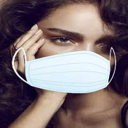

In [ ]:
data[0]

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
X.shape, Y.shape

((7553, 128, 128, 3), (7553,))

## Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

# CNN Model

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - acc: 0.7316 - loss: 0.6519 - val_acc: 0.8876 - val_loss: 0.2667
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8915 - loss: 0.2918 - val_acc: 0.8909 - val_loss: 0.2581
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9052 - loss: 0.2455 - val_acc: 0.9157 - val_loss: 0.2086
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.9307 - loss: 0.1951 - val_acc: 0.9091 - val_loss: 0.2132
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9289 - loss: 0.1801 - val_acc: 0.9207 - val_loss: 0.2129


## Model Evalution

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9202 - loss: 0.2387
Test Accuracy = 0.9179351329803467


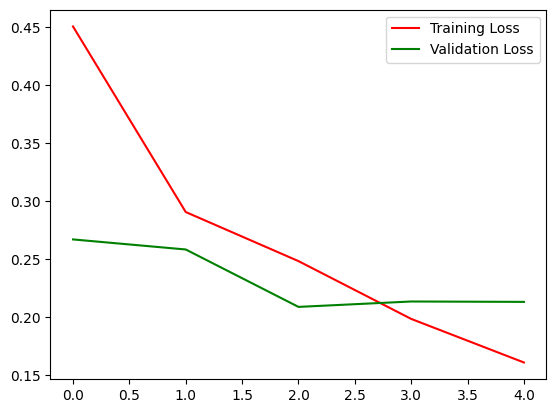

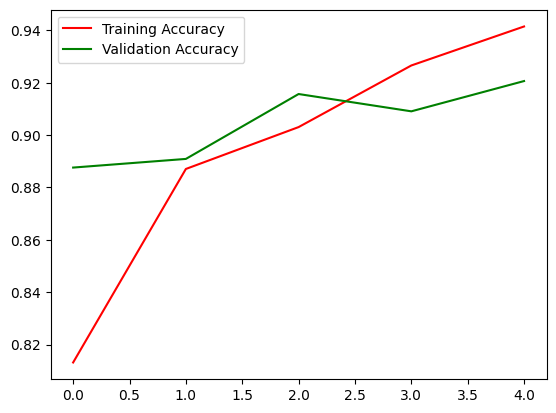

In [ ]:
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='green', label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], color='red', label='Training Accuracy')
plt.plot(history.history['val_acc'], color='green', label='Validation Accuracy')
plt.legend()
plt.show()

## Predict on the Images

Enter the image path: /content/CNN_Project_mask.png


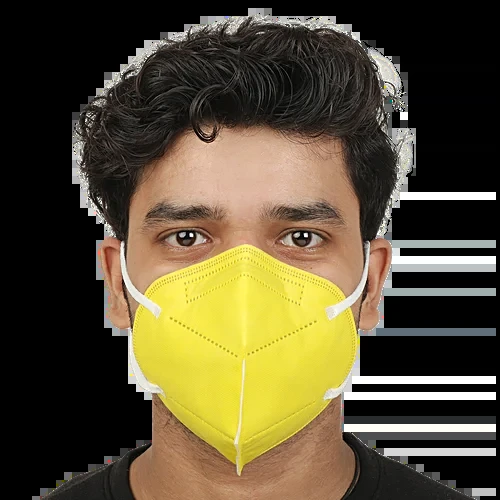

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction probabilities: [[0.0042961 0.9866356]]
Predicted class: 1
The person in the image is wearing a mask


In [ ]:
image_path = input("Enter the image path: ")

original_image = cv2.imread(image_path)
cv2_imshow(original_image)

resized_image = cv2.resize(original_image, (128, 128))
normalized_image = resized_image / 255.0

model_input = normalized_image.reshape(1, 128, 128, 3)

prediction = model.predict(model_input)
predicted_class = np.argmax(prediction)

print("Prediction probabilities:", prediction)
print("Predicted class:", predicted_class)

if predicted_class == 1:
    print("The person in the image is wearing a mask")
else:
    print("The person in the image is not wearing a mask")


Enter the image path: /content/CNN_Project_without_Mask.png


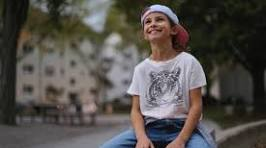

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediction probabilities: [[0.6489487 0.4424318]]
Predicted class: 0
The person in the image is not wearing a mask


In [ ]:
image_path = input("Enter the image path: ")

original_image = cv2.imread(image_path)
cv2_imshow(original_image)

resized_image = cv2.resize(original_image, (128, 128))
normalized_image = resized_image / 255.0

model_input = normalized_image.reshape(1, 128, 128, 3)

prediction = model.predict(model_input)
predicted_class = np.argmax(prediction)

print("Prediction probabilities:", prediction)
print("Predicted class:", predicted_class)

if predicted_class == 1:
    print("The person in the image is wearing a mask")
else:
    print("The person in the image is not wearing a mask")

# Saving the Model in Colab

In [37]:
from google.colab import files
files.download("face_mask_detection_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>